In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('data/match_data.csv')
df = df.drop(['Team1', 'Team2', 'Date'], axis=1)
df.head()

,Score,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,1,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,1,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,1,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [56]:
def sigmoid(z):
    """Numerically stable sigmoid function."""
    z = np.clip(z, -500, 500)  # Limit z to avoid overflow
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))

In [57]:
def cross_entropy(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [58]:
def compute_gradients(X, y, y_pred):
    diff = y_pred - y
    return np.dot(X.T, diff) / len(y)

In [59]:
def standardize_features(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [60]:
def initialize_weights(size):
    std_dev = np.sqrt(2 / (size + 1))
    return np.random.randn(size) * std_dev

In [61]:
def logistic_regression(X, y, lr, epochs, e=1e-6):
    w = initialize_weights(X.shape[1])
    losses = []
    for epoch in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        loss = cross_entropy(y, y_pred)
        gradients = compute_gradients(X, y, y_pred)
        w -= lr * gradients
        new_loss = cross_entropy(y, sigmoid(np.dot(X, w)))
        losses.append(new_loss)
        if epoch % 250 == 0:
            print(f'Epoch {epoch}, loss {loss}')
        if np.abs(new_loss - loss) < e:
            print(np.abs(new_loss - loss))
            print(f'Converged at epoch {epoch}')
            break
    return w, losses

In [62]:
def predict(X, w, threshold=0.5):
    z = np.dot(X, w)
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int)


In [1]:
X = df.drop(['Score'], axis=1)
X.head()


NameError: name 'df' is not defined

In [65]:
y = df['Score']

In [66]:
X = X.values
y = y.values

In [67]:
X

array([[ 4.  , 79.2 ,  1.  , ...,  0.74,  0.59, 35.1 ],
       [ 4.  , 79.2 ,  2.  , ...,  0.74,  0.57, 38.4 ],
       [ 4.  , 79.2 , 18.  , ...,  0.69,  0.66, 53.5 ],
       ...,
       [55.  , 36.6 , 46.  , ...,  0.7 ,  0.62, 53.7 ],
       [55.  , 36.6 , 45.  , ...,  0.65,  0.63, 55.4 ],
       [55.  , 36.6 , 75.  , ...,  0.71,  0.69, 54.7 ]])

In [68]:
X = standardize_features(X)

In [69]:
X[1]

array([-1.05145274,  1.65132967, -1.20676088,  1.41282585, -0.2319657 ,
       -0.27253566, -0.31315283,  0.90003205,  1.1673928 ,  0.97812987,
       -3.03465801, -1.63189269,  0.12523644, -1.14309623, -1.55142616,
       -0.33893255,  0.64052006, -0.08008058, -0.24422441, -1.81576738,
        3.81737174,  3.96143534,  0.34922635,  1.14321813, -1.54755109,
       -2.12039397, -0.12333656, -0.60567026, -0.72556889, -0.63272124,
        0.61203526, -0.80990526,  0.1502777 ,  0.21391327,  0.25406446,
        1.5487827 ,  1.01444233,  0.98116381, -0.02399162,  0.05204533,
        0.54632025,  0.58597532, -1.64480175, -1.44307383])

In [70]:
lr = 0.1
epochs = 10000

In [71]:
w, losses = logistic_regression(X, y, lr, epochs)

Epoch 0, loss 0.9459890872791092
Epoch 250, loss 0.6511882007411476
Epoch 500, loss 0.6495787150624139
Epoch 750, loss 0.6489247095169183
Epoch 1000, loss 0.6485120570003087
9.99346447372318e-07
Converged at epoch 1213


In [72]:
print(f"Weights: {w}")

Weights: [-0.40405318  0.25445948  0.39449294 -0.2422118   0.02060783 -0.04316972
  0.18388546 -0.11375026  0.18727607 -0.17185062  0.05751448  0.00903618
 -0.01228291 -0.02634977  0.10511725 -0.0105707  -0.11344284 -0.06443107
 -0.04843959 -0.0115789   0.06842453 -0.0072358  -0.08372377  0.12548952
  0.10799631 -0.0603736  -0.15943277  0.12159253 -0.1525753   0.16961265
 -0.05807318  0.05658135 -0.20638903  0.19653075 -0.12252505  0.007445
  0.13489792  0.07684496  0.04889601  0.04080881 -0.1591662   0.16654951
  0.03264831 -0.0283446 ]


Text(0, 0.5, 'Loss')

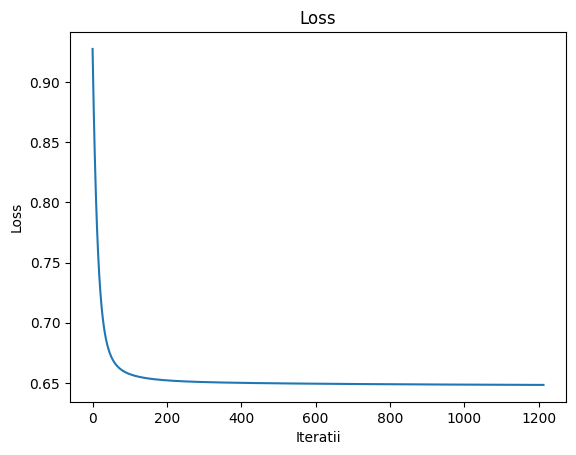

In [73]:
plt.title("Loss")
plt.plot(losses)
plt.xlabel("Iteratii")
plt.ylabel("Loss")

In [74]:
y_pred = predict(X, w)

In [75]:
print(classification_report(y, y_pred))
confusion_matrix = metrics.confusion_matrix(y, y_pred)
conf_matrix_df = pd.DataFrame(confusion_matrix, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1259
           1       0.63      0.61      0.62      1296

    accuracy                           0.62      2555
   macro avg       0.62      0.62      0.62      2555
weighted avg       0.62      0.62      0.62      2555

                 Predicted Negative  Predicted Positive
Actual Negative                 798                 461
Actual Positive                 499                 797


The accuracy of 74% provides a general sense of how often the model is correct but does not distinguish between the types of errors (false positives vs. false negatives).

The precision of 71% is decent, suggesting that when a positive class is predicted, it’s likely to be correct more than two-thirds of the time. However, about 29% of your positive predictions are false positives.

The recall of 77% is relatively high, which is good if it's critical not to miss any true positives. However, you're still missing about 23% of actual positives, which could be critical depending on the application.